# 

# Chat GPT

ChatGPT:

meer onderzoek naar hoe vatbaar ChatGPT of het GPT-3 model is voor engelstalige woorden in nederlandse teksten. zelfs met een nederlandstalige prompt wordt er sneller een engelstalig antwoord gegeven. dit blijkt minder het geval bij gpt-3 via de api


Werkwijze:

De volledige tekst als input meegeven lukt niet. De tekst wordt in twee delen opgesplitst en het model wordt gevraagd om van elk deel (~2 pagina's) de tien belangrijkste zinnen op te halen.

Prompt:

```
prompt: Geef de tien belangrijkste zinnen. Geef voor iedere zin de maximal marginal relevance (MMR) tot op drie decimalen na de komma.
formaat: belangrijke zin | MMR
tekst:
{tekst}
```

In [2]:
results_chatgpt = []

results_chatgpt.append("""Stotteren is een stoornis in de vloeiendheid van het spreken en kan verschillende problemen veroorzaken | 1.000
Binnen stottertherapie worden verschillende doelen nagestreefd, die kunnen worden ondergebracht in drie thema's | 0.903
Diverse therapeutische methoden, werkmodellen en behandeltechnieken kunnen worden gebruikt om de doelen van stottertherapie te bereiken | 0.803
De aangeleerde vaardigheden zullen worden toegepast in het dagelijks leven in de 'transferfase' | 0.908
De therapeut begeleidt de persoon die stottert in het automatiseren en generaliseren van de aangeleerde vaardigheden buiten de therapieruimte | 0.901
De fasen van de exposure-based treatment worden doorgaans toegepast bij deze transfer | 0.881
Een gepaste opbouw van de exposure-based treatment is belangrijk om demotivatie en een negatief zelfbeeld te voorkomen | 0.853
De concrete vraag die bij stottertherapeuten leeft, is hoe de transferfase verder kan worden ondersteund | 0.891
Virtuele realiteit (VR) wordt gebruikt bij het behandelen van angststoornissen en kan mogelijk ook worden gebruikt bij stottertherapie | 0.829
VR kan worden gebruikt om het dagelijkse leven op realistische wijze in de veilige omgeving van de therapieruimte te brengen | 0.821""")

results_chatgpt.append("""De testpersonen kozen zelf welk scenario voor hen het meest geschikt leek. | MMR: 1.000
Scenario 1 werd vier keer gekozen, scenario 2 vijf keer en scenario 3 vier keer. | MMR: 0.888
De gegeven instructies voor aanvang van de test met het prototype waren steeds dezelfde (zie bijlage 2). | MMR: 0.750
Tijdens de VR-ervaring observeerde de stottertherapeut/onderzoeker de testpersoon en noteerde de verbale en non-verbale reacties. | MMR: 0.500
Nadien werd de testpersoon door een tweede onderzoeker gevraagd naar hun ervaringen bij de afgelopen simulatie en de mate waarin deze simulatie als een meerwaarde werd gezien binnen therapie. | MMR: 0.875
Ook werd de kans gegeven verbetersuggesties te formuleren. | MMR: 0.750
Op basis van deze verbetersuggesties werd het prototype geoptimaliseerd op vlak van scenario en technische uitwerking. | MMR: 1.000
Inhoudelijk werd verder gewerkt met het meest gekozen scenario uit de eerste testfase, namelijk “jezelf voorstellen tijdens een informele voorstellingsronde in kleine groep”. | MMR: 0.875
Het merendeel van deze factoren werd geïntegreerd in het herwerkte scenario voor prototype 2 (zie bijlage 3). | MMR: 0.750
Na de uiting van de persoon die stottert werd overgegaan naar een nieuwe vraag. | MMR: 0.875""")

len(results_chatgpt)

2

In [3]:
sentences = []

for r in results_chatgpt:
    sent_token = r.split('\n')
    for s in sent_token:
        t = s.split('|')
        sentences.append(t)

In [4]:
sentences

[['Stotteren is een stoornis in de vloeiendheid van het spreken en kan verschillende problemen veroorzaken ',
  ' 1.000'],
 ["Binnen stottertherapie worden verschillende doelen nagestreefd, die kunnen worden ondergebracht in drie thema's ",
  ' 0.903'],
 ['Diverse therapeutische methoden, werkmodellen en behandeltechnieken kunnen worden gebruikt om de doelen van stottertherapie te bereiken ',
  ' 0.803'],
 ["De aangeleerde vaardigheden zullen worden toegepast in het dagelijks leven in de 'transferfase' ",
  ' 0.908'],
 ['De therapeut begeleidt de persoon die stottert in het automatiseren en generaliseren van de aangeleerde vaardigheden buiten de therapieruimte ',
  ' 0.901'],
 ['De fasen van de exposure-based treatment worden doorgaans toegepast bij deze transfer ',
  ' 0.881'],
 ['Een gepaste opbouw van de exposure-based treatment is belangrijk om demotivatie en een negatief zelfbeeld te voorkomen ',
  ' 0.853'],
 ['De concrete vraag die bij stottertherapeuten leeft, is hoe de transfe

In [5]:
import spacy
nlp = spacy.load("nl_core_news_md")
import textstat


def get_sentence_length(sentence):
    doc = nlp(sentence)
    return len(doc)

def calculate_fre_score(sentence):
    score = textstat.flesch_reading_ease(sentence)
    return score


In [6]:
import pandas as pd
df_chatgpt = pd.DataFrame(sentences, columns =['Zin', 'MMR'])
df_chatgpt['sentence_length'] = df_chatgpt['Zin'].apply(get_sentence_length)
df_chatgpt['fre'] = df_chatgpt['Zin'].apply(calculate_fre_score)

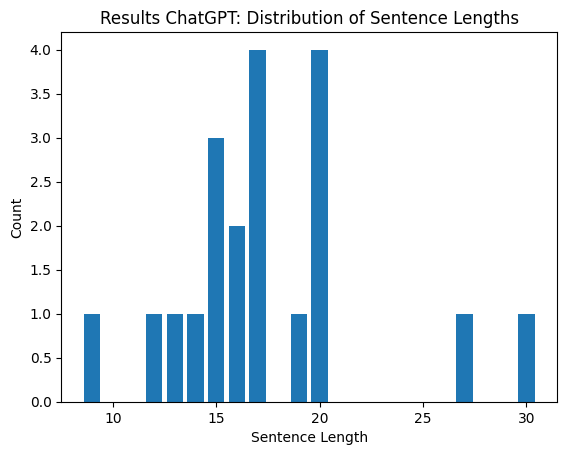

In [7]:
import matplotlib.pyplot as plt
grouped = df_chatgpt.groupby('sentence_length')['sentence_length'].count().reset_index(name='count')
plt.bar(grouped['sentence_length'], grouped['count'])
plt.xlabel('Sentence Length')
plt.ylabel('Count')
plt.title('Results ChatGPT: Distribution of Sentence Lengths')
plt.show()

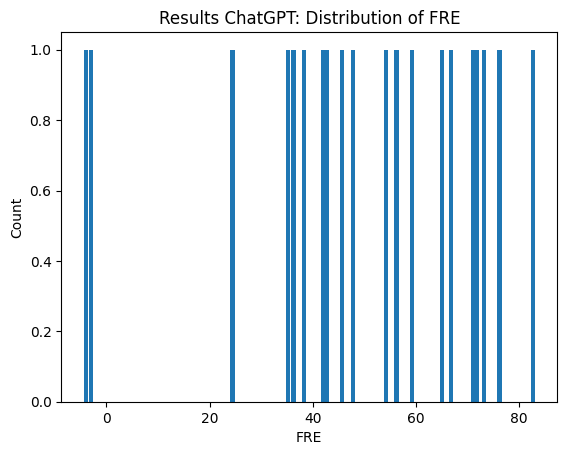

In [8]:
import matplotlib.pyplot as plt
grouped = df_chatgpt.groupby('fre')['fre'].count().reset_index(name='count')
plt.bar(grouped['fre'], grouped['count'])
plt.xlabel('FRE')
plt.ylabel('Count')
plt.title('Results ChatGPT: Distribution of FRE')
plt.show()

# Algemene statistieken

In [9]:
from summarizer import Summarizer
model = Summarizer()

c:\Users\Dylan\AppData\Local\Programs\Python\Python310\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Some weights of the model checkpoint at bert-large-uncased were not used when initializing BertModel: ['cls.predictions.bias', 'cls.predictions.transform.dense.bias', 'cls.predictions.decoder.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.seq_relationship.weight', 'cls.predictions.transform.dense.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expe

In [10]:
total = ""
for i in range(len(sentences)):
    total += sentences[i][0] + '\n'

In [11]:
model(total)

'Scenario 1 werd vier keer gekozen, scenario 2 vijf keer en scenario 3 vier keer. Het merendeel van deze factoren werd geïntegreerd in het herwerkte scenario voor prototype 2 (zie bijlage 3).'

In [12]:
res = model.calculate_elbow(total, k_max=10)
print(res)

[790.4619140625, 396.69415283203125, 274.0863037109375, 206.6145477294922, 139.9480438232422, 88.47152709960938, 51.14727020263672, 18.17520523071289]


## Optimaal aantal zinnen terugvinden

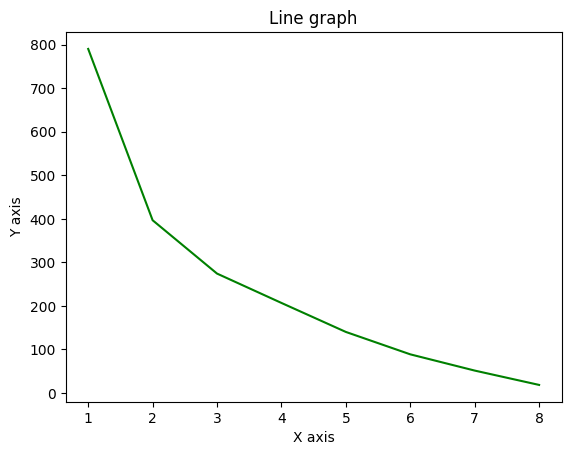

In [13]:
import numpy as np
import matplotlib.pyplot as plt

y = res
x = np.arange(1,9)

plt.title("Line graph")
plt.xlabel("X axis")
plt.ylabel("Y axis")
plt.plot(x, y, color ="green")
plt.show()


In [20]:
res = model.calculate_optimal_k(total, k_max=10)
print(res)

3


In [14]:
model(
    total,
    num_sentences=res
    )

TypeError: unsupported operand type(s) for -: 'list' and 'int'